In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the list of projects
projects = [
    "AndroidUtilCode", "cassandra", "CoreNLP", "kafka", "metersphere",
    "netty", "NewPipe", "spring-boot", "spring-framework", "tutorials"
]

# Function to load data with additional columns for Project and Filename
def load_data(file_path, project_name, file_column_name):
    # Load the dataset
    data = pd.read_csv(file_path)
    # Use os.path.basename to extract the filename from the full path stored in the specified file column
    data['Filename'] = data[file_column_name].apply(os.path.basename)
    # Add project name as a new column
    data['Project'] = project_name
    return data


In [2]:

# Load CK metrics and bad smells data for each project, with correct project and filename tagging
ck_metrics_combined = pd.concat(
    [load_data(f"C:/User/manoj/Final Project/Ck metriics/{project}class.csv", project, 'file') for project in projects],
    ignore_index=True
)

bad_smells_combined = pd.concat(
    [load_data(f"C:/User/manoj/Final Project/Bad Smells/{project}_bad_smells.csv", project, 'File') for project in projects],
    ignore_index=True
)

# Example to print the head of combined data to check
print(ck_metrics_combined.head())
print(bad_smells_combined.head())


                                                file  \
0  C:\User\manoj\Projects\AndroidUtilCode\lib\uti...   
1  C:\User\manoj\Projects\AndroidUtilCode\lib\uti...   
2  C:\User\manoj\Projects\AndroidUtilCode\lib\uti...   
3  C:\User\manoj\Projects\AndroidUtilCode\lib\uti...   
4  C:\User\manoj\Projects\AndroidUtilCode\lib\uti...   

                                               class       type  cbo  \
0     com.blankj.utilcode.util.ShellUtils$Anonymous1  anonymous    2   
1           com.blankj.utilcode.util.PermissionUtils      class   21   
2  com.blankj.utildebug.base.view.FloatToast$Anon...  anonymous    1   
3   com.blankj.utilcode.util.NetworkUtils$Anonymous6  anonymous    2   
4   com.blankj.utilcode.util.NetworkUtils$Anonymous7  anonymous    2   

   cboModified  fanin  fanout  wmc  dit  noc  ...  variablesQty  \
0            2      0       2    1    1    0  ...             0   
1           27      6      21   65    2    0  ...            30   
2            1      0       1

In [3]:
bad_smells_combined.head()

,Problem,Package,File,Priority,Line,Description,Rule set,Rule,Filename,Project
0,1,com.blankj.base.mvp,C:\User\manoj\Projects\AndroidUtilCode\lib\bas...,3,87,Access to field `ON_DESTROY` on foreign value ...,Design,LawOfDemeter,BaseView.java,AndroidUtilCode
1,1,com.blankj.base.rv,C:\User\manoj\Projects\AndroidUtilCode\lib\bas...,3,49,Access to field `itemView` on foreign value `h...,Design,LawOfDemeter,BaseItem.java,AndroidUtilCode
2,2,com.blankj.base.rv,C:\User\manoj\Projects\AndroidUtilCode\lib\bas...,3,59,Access to field `itemView` on foreign value `h...,Design,LawOfDemeter,BaseItem.java,AndroidUtilCode
3,3,com.blankj.base.rv,C:\User\manoj\Projects\AndroidUtilCode\lib\bas...,3,62,Access to field `itemView` on foreign value `h...,Design,LawOfDemeter,BaseItem.java,AndroidUtilCode
4,4,com.blankj.base.rv,C:\User\manoj\Projects\AndroidUtilCode\lib\bas...,3,73,Access to field `itemView` on foreign value `h...,Design,LawOfDemeter,BaseItem.java,AndroidUtilCode


In [4]:

# Export the combined CK metrics data to a CSV file
ck_metrics_combined.to_csv('C:/User/manoj/Final Project/Combined_CK_Metrics.csv', index=False)

# Export the combined bad smells data to a CSV file
bad_smells_combined.to_csv('C:/User/manoj/Final Project/Combined_Bad_Smells.csv', index=False)

In [5]:
bad_smells_combined['Bad Smells Count'] = bad_smells_combined.groupby(['Filename', 'Project'])['Problem'].transform('count')
bad_smells_combined = bad_smells_combined.drop_duplicates(subset=['Filename', 'Project'])

# Re-merge the datasets with updated bad smells counts
combined_data = pd.merge(ck_metrics_combined, bad_smells_combined, on=['Filename', 'Project'])



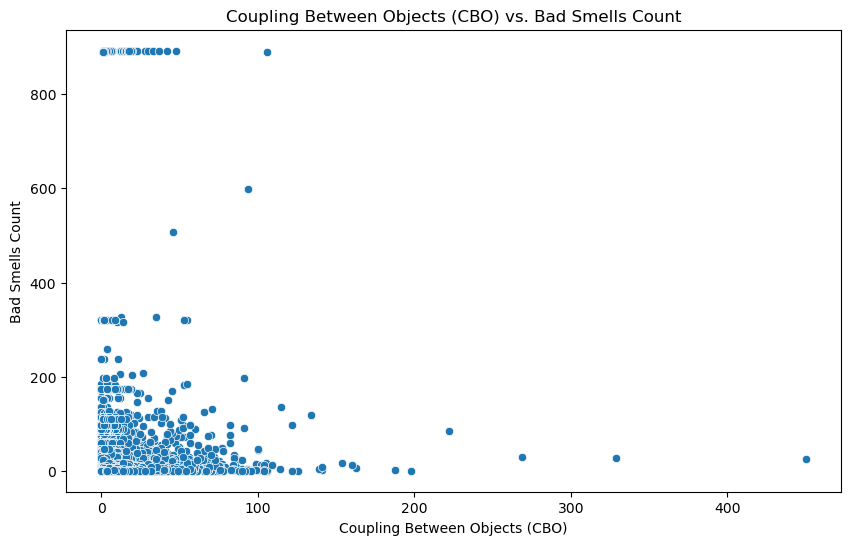

In [6]:
# Plot 1: Coupling Between Objects (CBO) vs. Bad Smells Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cbo', y='Bad Smells Count', data=combined_data)
plt.title('Coupling Between Objects (CBO) vs. Bad Smells Count')
plt.xlabel('Coupling Between Objects (CBO)')
plt.ylabel('Bad Smells Count')
plt.show()


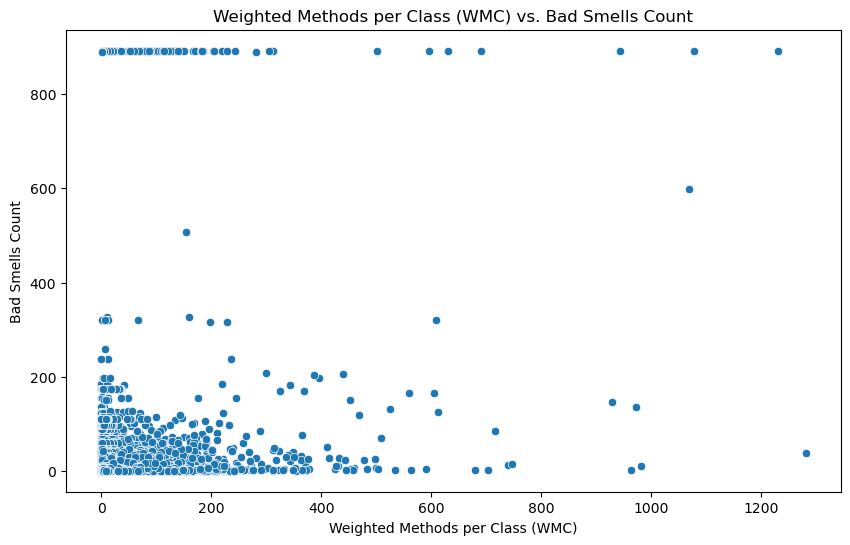

In [7]:
# Plot 2: WMC (Weighted Methods per Class) vs. Bad Smells Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wmc', y='Bad Smells Count', data=combined_data)
plt.title('Weighted Methods per Class (WMC) vs. Bad Smells Count')
plt.xlabel('Weighted Methods per Class (WMC)')
plt.ylabel('Bad Smells Count')
plt.show()


In [8]:
# Create a summary table to describe main values for each project
summary_table = combined_data.groupby('Project').agg({
    'wmc': ['mean', 'median', 'max'],
    'cbo': ['mean', 'median', 'max'],
    'Bad Smells Count': ['mean', 'median', 'max']
}).reset_index()

# Rename columns for clarity
summary_table.columns = ['Project', 'WMC Mean', 'WMC Median', 'WMC Max',
                         'CBO Mean', 'CBO Median', 'CBO Max',
                         'Bad Smells Mean', 'Bad Smells Median', 'Bad Smells Max']

# Display the summary table
print(summary_table)

            Project   WMC Mean  WMC Median  WMC Max   CBO Mean  CBO Median  \
0   AndroidUtilCode  20.534819         3.0      534   4.947075         2.0   
1           CoreNLP  33.515842         7.0     1281   6.933153         4.0   
2           NewPipe  24.688356         6.0      444  10.352740         5.0   
3         cassandra  14.052581         6.0     1069   7.866243         5.0   
4             kafka  19.189244         5.0      590   9.813445         4.0   
5       metersphere  18.937775         1.0      458   7.005507         3.0   
6             netty  12.195676         1.0      747   4.451447         2.0   
7       spring-boot   6.137019         3.0      123   5.081731         3.0   
8  spring-framework  12.201310         2.0      928   5.749683         3.0   
9         tutorials   6.427946         5.0      133   3.682169         2.0   

   CBO Max  Bad Smells Mean  Bad Smells Median  Bad Smells Max  
0       63        10.696379                7.0              69  
1      222 